El largo de la curva del fractal de Koch es: 2367.696884330754


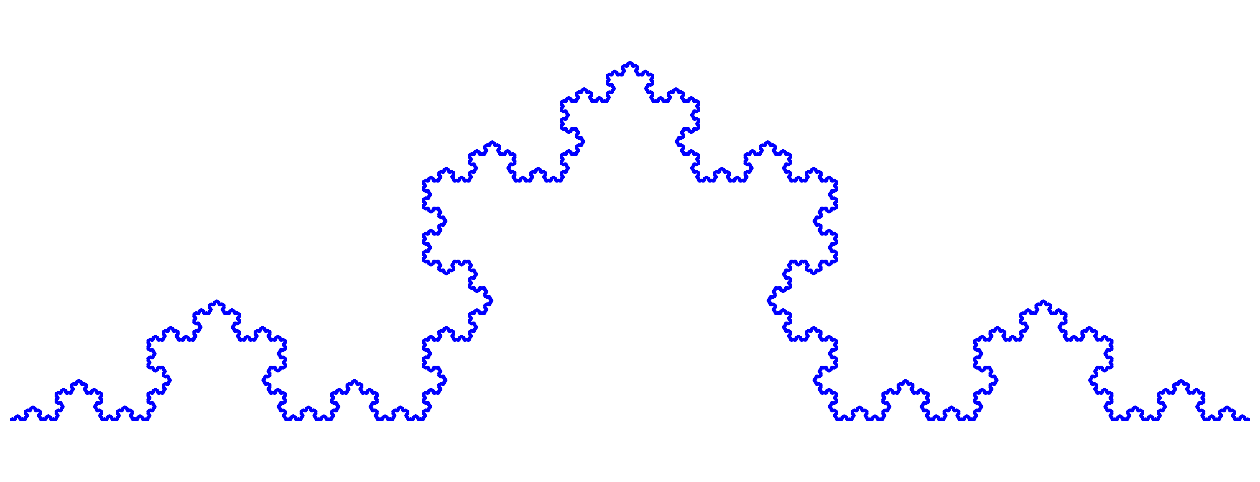

In [4]:
# Look at simple coch fractal
import numpy as np
import matplotlib.pyplot as plt

L = 100                      # Largo de la curva
angle = np.pi*60/180         # grados de sexagesimal a radianes
xi, xf, yi, yf = 0, L, 0, 0  # valores de coordenadas de los extremos
a = (xi, yi)                 # coordenada borde izquierdo
b = (xf, yf)                 # coordenada borde derecho
n = 11                        # número de iteraciones
points = [a]                 # guardamos las coordenadas como una lista

# Función que crea las coordenadas
def koch(a, b, n):
    if n == 0:
        return
    s = (a[0] + (b[0] - a[0])/3, a[1] + (b[1] - a[1])/3)
    t = (a[0] + (b[0] - a[0])*2/3, a[1] + (b[1] - a[1])*2/3)
    u = (s[0] + (t[0] - s[0])*np.cos(angle) - (t[1] - s[1])*np.sin(angle),
         s[1] + (t[0] - s[0])*np.sin(angle) + (t[1] - s[1])*np.cos(angle))
    
    koch(a, s, n-1)
    points.append(s)
    koch(s, u, n-1)
    points.append(u)
    koch(u, t, n-1)
    points.append(t)
    koch(t, b, n-1)

# Creamos los datos para el gráfico
koch(a, b, n)
points.append(b)

x = [points[i][0] for i in range(len(points))] # datos para el eje x 
y = [points[i][1] for i in range(len(points))] # datos para e eje y 

# Calcular el largo de la curva del fractal de Koch
curve_length = 0
for i in range(len(points) - 1):
    x1, y1 = points[i]
    x2, y2 = points[i + 1]
    curve_length += np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

print("El largo de la curva del fractal de Koch es:", curve_length)


# Graficamos el fractal de Koch
plt.figure(figsize=(16, 6))  # Por ejemplo, 8 pulgadas de ancho y 6 pulgadas de alto
plt.plot(x, y, color="blue")
plt.axis('off')
plt.axis("equal") 
# Establecer límites de los ejes
plt.xlim(min(x), max(x)) 
plt.ylim(min(b), max(y)) 
plt.show()